In [29]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [31]:
# Load the general dataset

BMIData = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\BMI_Analysis_V1.1.csv", header=0)

# Copy the data to backup file

BMIData_BK = BMIData.copy()

# Display first 5 records

BMIData.head()

,Height_M,Weight_kg,Fat_age,BMI
0,1.60,49.44,23.9,19.31
1,1.65,62.60,28.8,22.96
2,1.65,75.75,32.4,27.79
3,1.53,48.99,25.8,20.92
4,1.45,43.09,22.5,20.38


In [32]:
BMIData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Height_M   92 non-null     float64
 1   Weight_kg  92 non-null     float64
 2   Fat_age    92 non-null     float64
 3   BMI        92 non-null     float64
dtypes: float64(4)
memory usage: 3.0 KB


In [33]:
# Display the shape of the dataset

BMIData.shape

(92, 4)

In [34]:
# Display "Descriptive Statistical Analysis"

BMIData.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_M,92.0,1.511522,0.074035,1.33,1.4600,1.500,1.570,1.66
Weight_kg,92.0,47.865000,13.077016,29.26,38.9525,45.475,52.705,87.54
Fat_age,92.0,26.961957,7.142888,15.60,21.0750,25.500,31.975,46.00
BMI,92.0,20.705435,4.325066,14.99,17.7075,19.480,22.735,34.46


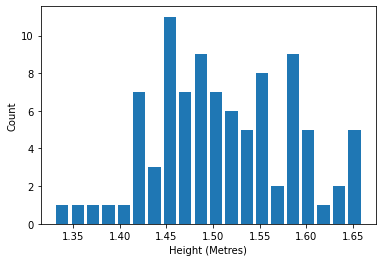

In [35]:
# Plot Histogram with 'Height'

plt.hist(BMIData.Height_M, bins=20, rwidth=0.8)
plt.xlabel('Height (Metres)')
plt.ylabel('Count')
plt.show()

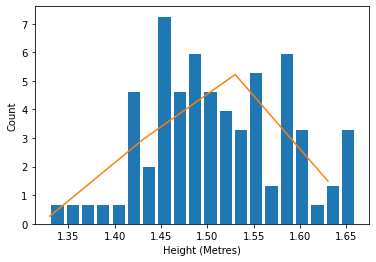

In [36]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(BMIData.Height_M, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (Metres)')
plt.ylabel('Count')

rng = np.arange(BMIData.Height_M.min(), BMIData.Height_M.max(), 0.1)
plt.plot(rng, norm.pdf(rng, BMIData.Height_M.mean(),BMIData.Height_M.std()))

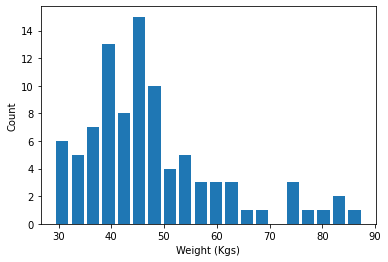

In [37]:
# Plot Histogram with 'Weight'

plt.hist(BMIData.Weight_kg, bins=20, rwidth=0.8)
plt.xlabel('Weight (Kgs)')
plt.ylabel('Count')
plt.show()

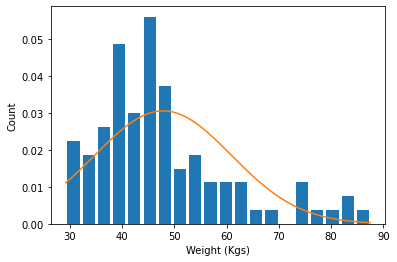

In [38]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(BMIData.Weight_kg, bins=20, rwidth=0.8, density=True)
plt.xlabel('Weight (Kgs)')
plt.ylabel('Count')

rng = np.arange(BMIData.Weight_kg.min(), BMIData.Weight_kg.max(), 0.1)
plt.plot(rng, norm.pdf(rng, BMIData.Weight_kg.mean(),BMIData.Weight_kg.std()))

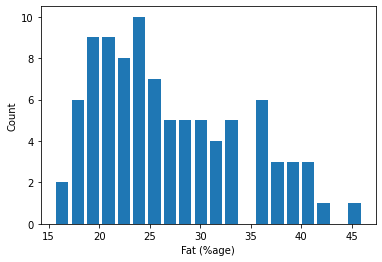

In [39]:
# Plot Histogram with 'Fat %'

plt.hist(BMIData.Fat_age, bins=20, rwidth=0.8)
plt.xlabel('Fat (%age)')
plt.ylabel('Count')
plt.show()

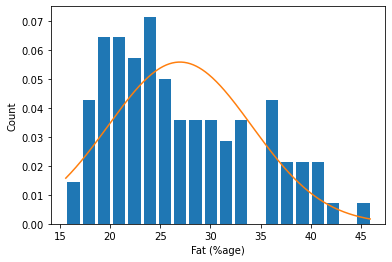

In [40]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(BMIData.Fat_age, bins=20, rwidth=0.8, density=True)
plt.xlabel('Fat (%age)')
plt.ylabel('Count')

rng = np.arange(BMIData.Fat_age.min(), BMIData.Fat_age.max(), 0.1)
plt.plot(rng, norm.pdf(rng, BMIData.Fat_age.mean(),BMIData.Fat_age.std()))

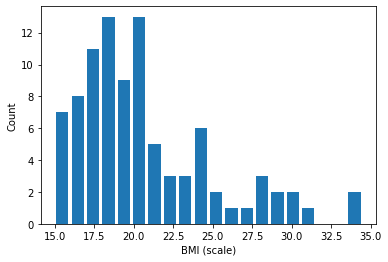

In [41]:
# Plot Histogram with 'BMI'

plt.hist(BMIData.BMI, bins=20, rwidth=0.8)
plt.xlabel('BMI (scale)')
plt.ylabel('Count')
plt.show()

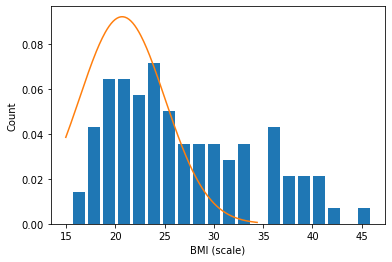

In [42]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(BMIData.Fat_age, bins=20, rwidth=0.8, density=True)
plt.xlabel('BMI (scale)')
plt.ylabel('Count')

rng = np.arange(BMIData.BMI.min(), BMIData.BMI.max(), 0.1)
plt.plot(rng, norm.pdf(rng, BMIData.BMI.mean(),BMIData.BMI.std()))

In [43]:
BMIData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Height_M   92 non-null     float64
 1   Weight_kg  92 non-null     float64
 2   Fat_age    92 non-null     float64
 3   BMI        92 non-null     float64
dtypes: float64(4)
memory usage: 3.0 KB


In [44]:
# Calculate the Lower Limit and Upper Limit of each variable

hll = round(BMIData.Height_M.mean() - 3 * BMIData.Height_M.std(), 3)
hul = round(BMIData.Height_M.mean() + 3 * BMIData.Height_M.std(),3)
wll = round(BMIData.Weight_kg.mean() - 3 * BMIData.Weight_kg.std(), 3)
wul = round(BMIData.Weight_kg.mean() + 3 * BMIData.Weight_kg.std(), 3)
fll = round(BMIData.Fat_age.mean() - 3 * BMIData.Fat_age.std(), 3)
ful = round(BMIData.Fat_age.mean() + 3 * BMIData.Fat_age.std(),3)
bll = round(BMIData.BMI.mean() - 3 * BMIData.BMI.std(), 3)
bul = round(BMIData.BMI.mean() + 3 * BMIData.BMI.std(),3)

In [45]:
# Eliminate the outliers

BMIData_new = BMIData[(BMIData.Height_M > hll) & (BMIData.Height_M < hul)]
BMIData_new = BMIData_new[(BMIData_new.Weight_kg > wll) & (BMIData_new.Weight_kg < wul)]
BMIData_new = BMIData_new[(BMIData_new.Fat_age > fll) & (BMIData_new.Fat_age < ful)]
BMIData_new = BMIData_new[(BMIData_new.BMI > bll) & (BMIData_new.BMI < bul)]
BMIData_new.head()

,Height_M,Weight_kg,Fat_age,BMI
0,1.60,49.44,23.9,19.31
1,1.65,62.60,28.8,22.96
2,1.65,75.75,32.4,27.79
3,1.53,48.99,25.8,20.92
4,1.45,43.09,22.5,20.38


In [46]:
BMIData_new.shape

(91, 4)

In [47]:
BMIData.shape

(92, 4)

In [48]:
BMIData.shape[0] - BMIData_new.shape[0]

1

# Box Plot Method

<AxesSubplot:xlabel='Height_M'>

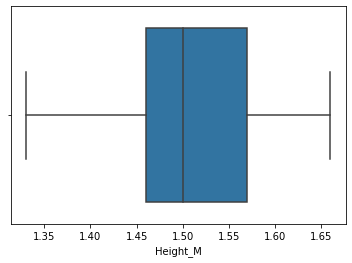

In [49]:
# Display the box plot to show the outliers

import seaborn as sns

sns.boxplot(x=BMIData["Height_M"])

In [50]:
BMIData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Height_M   92 non-null     float64
 1   Weight_kg  92 non-null     float64
 2   Fat_age    92 non-null     float64
 3   BMI        92 non-null     float64
dtypes: float64(4)
memory usage: 3.0 KB


In [51]:
# Calculating the Q1, Q3 and Inter quartile range (IQR) for Height

H_first_quantile = BMIData["Height_M"].quantile(.25)
H_third_quantile = BMIData["Height_M"].quantile(.75)
H_IQR = H_third_quantile - H_first_quantile

# Calculate the Upper bound

H_Upper_bound = round(H_third_quantile + 1.5 * H_IQR, 3)
print(H_Upper_bound)

# Calculate the lower bound

H_Lower_bound = round(H_first_quantile - 1.5 * H_IQR, 3)
print(H_Lower_bound)

# Calculating the Q1, Q3 and Inter quartile range (IQR) for Weight

W_first_quantile = BMIData["Weight_kg"].quantile(.25)
W_third_quantile = BMIData["Weight_kg"].quantile(.75)
W_IQR = W_third_quantile - W_first_quantile

# Calculate the Upper bound

W_Upper_bound = round(W_third_quantile + 1.5 * W_IQR, 3)
print(W_Upper_bound)

# Calculate the lower bound

W_Lower_bound = round(W_first_quantile - 1.5 * W_IQR, 3)
print(W_Lower_bound)



1.735
1.295
73.334
18.324


In [52]:
BMIData_new = BMIData[(BMIData.Height_M > H_Lower_bound) & (BMIData.Height_M < H_Upper_bound)]
BMIData_new = BMIData_new[(BMIData_new.Weight_kg > H_Lower_bound) & (BMIData_new.Weight_kg < H_Upper_bound)]

In [58]:
BMIData_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Height_M   0 non-null      float64
 1   Weight_kg  0 non-null      float64
 2   Fat_age    0 non-null      float64
 3   BMI        0 non-null      float64
dtypes: float64(4)
memory usage: 0.0 bytes


In [53]:
# Identify the Independent and Target variables

IndepVar = []
for col in BMIData_new.columns:
    if col != 'BMI':
        IndepVar.append(col)

TargetVar = 'BMI'

x = BMIData_new[IndepVar]
y = BMIData_new[TargetVar]

In [54]:
len(BMIData_new)

0

In [57]:
BMIData_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Height_M   0 non-null      float64
 1   Weight_kg  0 non-null      float64
 2   Fat_age    0 non-null      float64
 3   BMI        0 non-null      float64
dtypes: float64(4)
memory usage: 0.0 bytes


In [55]:
x

,Height_M,Weight_kg,Fat_age


In [46]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,train_size = 0.7, test_size = 0.30, random_state = 42)

ValueError: With n_samples=0, test_size=0.3 and train_size=0.7, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [44]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

NameError: name 'x_train' is not defined

# Build the Multi Regression model

In [45]:
# Train the algorithm and build the model with train dataset

from sklearn.linear_model import LinearRegression

MulRGR = LinearRegression()

# Train the model with training dataset

MulRGR.fit(x_train, y_train)

# Predict the model with test dataset

y_pred = MulRGR.predict(x_test)

# Evaluation metrics for Regression analysis

from sklearn import metrics

print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

# Define the function to calculate the MAPE - Mean Absolute Percentage Error

def MAPE (y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Evaluation of MAPE 

result = MAPE(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', round(result, 3), '%')

# Calculate Adjusted R squared values 

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Mean Absolute Error (MAE): 0.548
Mean Squared Error (MSE): 0.478
Root Mean Squared Error (RMSE): 0.691
R2_score: 0.972903
Root Mean Squared Log Error (RMSLE): -0.369
Mean Absolute Percentage Error (MAPE): 2.763 %
Adj R Square:  0.971969


In [46]:
Results = pd.DataFrame({'BMI_A':y_test, 'BMI_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = BMIData_BK.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(10)

,Height_M,Weight_kg,Fat_age,BMI,BMI_A,BMI_P
0,1.60,49.44,23.9,19.31,19.31,18.206956
11,1.55,53.07,27.9,22.11,22.11,21.562702
44,1.55,44.68,22.9,18.61,18.61,17.618054
66,1.53,73.37,40.5,31.33,31.33,31.755510
67,1.57,59.87,26.4,24.14,24.14,23.870479
71,1.47,41.28,24.5,19.02,19.02,18.690785
33,1.53,44.11,21.3,18.84,18.84,17.914574
4,1.45,43.09,22.5,20.38,20.38,20.019596
86,1.49,41.62,24.5,18.69,18.69,18.216381
55,1.49,58.29,36.7,26.17,26.17,26.161972


In [47]:
# Correlation coefficient 

BMIData_new.corr()

,Height_M,Weight_kg,Fat_age,BMI
Height_M,1.000000,0.692645,0.260275,0.419131
Weight_kg,0.692645,1.000000,0.779047,0.940749
Fat_age,0.260275,0.779047,1.000000,0.869151
BMI,0.419131,0.940749,0.869151,1.000000


Feature: 0, Score: -7.18288
Feature: 1, Score: 20.78868
Feature: 2, Score: 1.08701


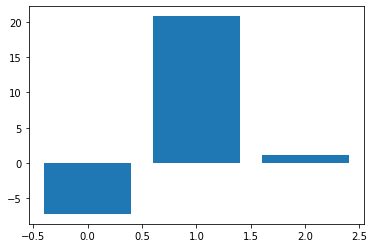

In [48]:
# Display feature importance

importance = MulRGR.coef_

# Summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Run and compare all regression algorithms

In [49]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelABR = AdaBoostRegressor(n_estimators=50, base_estimator=None ,learning_rate=1)
modelSVR = SVR()
modelGBR = GradientBoostingRegressor()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelMLPR = MLPRegressor()

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelABR, modelSVR, modelGBR, modelXGR, modelKNN, modelETR, modelMLPR]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 0.548
Mean Squared Error (MSE): 0.478
Root Mean Squared Error (RMSE): 0.691
R2_score: 0.972903
Root Mean Squared Log Error (RMSLE): -0.369
Mean Absolute Percentage Error (MAPE): 2.76 %
Adj R Square:  0.971969
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1.64
Mean Squared Error (MSE): 3.924
Root Mean Squared Error (RMSE): 1.981
R2_score: 0.777501
Root Mean Squared Log Error (RMSLE): 0.684
Mean Absolute Percentage Error (MAPE): 7.76 %
Adj R Square:  0.769829
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1.212
Mean Squared Error (MSE): 2.17
Root Mean Squared Error (RMSE): 1.473
R2_score: 0.876977
Root Mean Squared Log Error (RMSLE): 0.387
Mean Absolute Percentage Error (MAPE): 5.6